<a href="https://colab.research.google.com/github/nilesh07g/oibsip_03/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP**

**📚TASK-03 : CAR PRICE PREDICTOR**

**👨‍💼NAME : G.Y.N.V.NILESH**

**📅BATCH : OCTOBER PHASE-2 OIBSIP**

**📊DOMAIN : DATA SCIENCE**

**🎯AIM : TO CHECK DIFFERENT MODEL PERFORAMANCES AND PREDICT CAR PRICE MORE ACCURATELY.**

**💡ALGORITHMS USED: GradientBoostingRegressor,LinearRegression,XGBRegressor,RandomForestRegressor**

**🚀IMPORTING LIBRARIES**

In [141]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

**IGNORING WARNINGS**

In [142]:
warnings.filterwarnings('ignore')

**📁LOAD DATASET**

In [143]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**📖READ CSV FILE**

In [144]:
df = pd.read_csv('car data.csv')

In [145]:
df.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [146]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


**👀CHECKING OF ROWS AND COLOMNS IN DATA SET**

In [147]:
df.shape

(301, 9)

**ROWS**

In [148]:
print('no of rows in data set are:',df.shape[0])

no of rows in data set are: 301


**COLOMNS**

In [149]:
print('no of colomns in data set are:',df.shape[1])

no of colomns in data set are: 9


**📝INFORMATION OF DATA SET**

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**🔍CHECKING OF NULL VALUES**

In [151]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [152]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**🔍CHECKING OF OVERALL STATISTICS**

In [153]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**🔄DATA PRE-PROCESSING**

In [154]:
import datetime

In [155]:
date_time = datetime.datetime.now()
print(date_time)

2023-10-30 13:00:22.931427


In [156]:
print(date_time.year)

2023


**ADDING 'AGE' COLOMN**

In [157]:
df['Age']=date_time.year - df['Year']


In [158]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [159]:
df.shape

(301, 10)

**DELETING 'YEAR' COLOMN**

In [160]:
df.drop('Year',axis=1,inplace=True)


In [161]:
df.shape

(301, 9)

In [162]:
df.tail()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
296,city,9.50,11.6,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.9,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.0,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.5,9000,Diesel,Dealer,Manual,0,6
300,brio,5.30,5.9,5464,Petrol,Dealer,Manual,0,7


**🚫OUTLIER REMOVAL**

<Axes: >

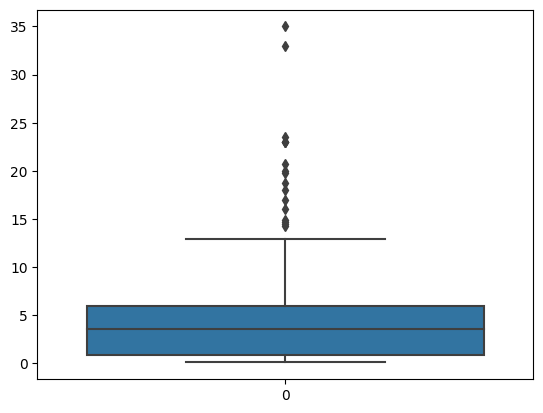

In [163]:
sns.boxplot(df['Selling_Price'])

In [164]:
#hear rectangle indicates that more values are concentrated at that range here in this case in lpower quartile ie near('0')

<Axes: >

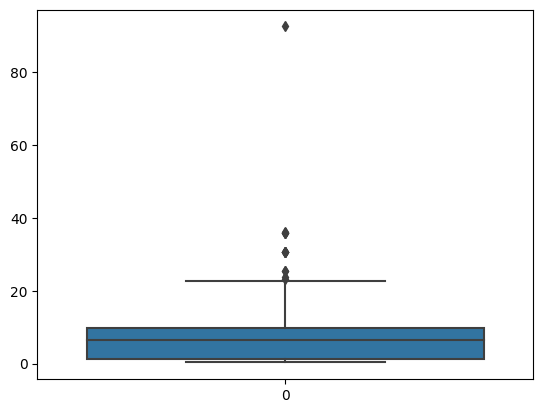

In [165]:
sns.boxplot(df['Present_Price'])

In [166]:
sorted(df['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [167]:
#removing outliers range from data set
df = df[~(df['Selling_Price']>=33.0) & (df['Selling_Price']<=35.0)]


In [168]:
df.shape

(299, 9)

**🔢ENCODING**

In [169]:
#encode
df.head(2)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [170]:
#now encode 'Fuel_Type', 'Selling_type' ,'Transmission'	into numerical values


**ENCODING 'FUEL_TYPE' COLOMN**

In [171]:
#encoding 'Fuel_Type' into numerical values

In [172]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [173]:
#creating a Fuel_type dict
fuel_type_dict = {'Petrol':0,'Diesel':1,'CNG':2}

In [174]:
df['Fuel_Type'] = df['Fuel_Type'].map(fuel_type_dict)

In [175]:
df['Fuel_Type'].unique()

array([0, 1, 2])

**ENCODING 'Selling_type' COLOMN**

In [176]:
#encoding 'Selling_type' into numerical values

In [177]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [178]:
# creating a Selling_type dict
Selling_type_dict = {'Dealer':0,'Individual':1}

In [179]:
df['Selling_type'] = df['Selling_type'].map(Selling_type_dict)

In [180]:
df['Selling_type'].unique()

array([0, 1])

**ENCODING 'TRANSMISSION' COLOMN**

In [181]:
#Encoding 'Transmission' into numerical values

In [182]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [183]:
# creating a Transmission dict
Transmission_dict = {'Manual':0,'Automatic':1}

In [184]:
df['Transmission'] = df['Transmission'].map(Transmission_dict)

In [185]:
df['Transmission'].unique()

array([0, 1])

In [186]:
#succesfully changed into numeric values
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,9
1,sx4,4.75,9.54,43000,1,0,0,0,10
2,ciaz,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2.85,4.15,5200,0,0,0,0,12
4,swift,4.60,6.87,42450,1,0,0,0,9


**STORE FEATURE MATRIX IN 'X' AND TARGET IN 'Y'**

In [187]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [188]:
X


,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,9
1,9.54,43000,1,0,0,0,10
2,9.85,6900,0,0,0,0,6
3,4.15,5200,0,0,0,0,12
4,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,7
297,5.90,60000,0,0,0,0,8
298,11.00,87934,0,0,0,0,14
299,12.50,9000,1,0,0,0,6


In [189]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


**✂️SPLIT DATA SET INTO TRAINING AND TEST SET**

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)


**🚀IMPORT MODELS**

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



**MODEL INITIALISATION**

In [193]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

xg = XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**🔮PREDICTION ON TEST DATA**

In [194]:
Y_pred1 = lr.predict(X_test)
Y_pred2 = rf.predict(X_test)
Y_pred3 = xgb.predict(X_test)
Y_pred4 = xg.predict(X_test)

**📊EVALUATING ALGORITHMS**

In [195]:
from sklearn import metrics

In [196]:
score1 = metrics.r2_score(Y_test,Y_pred1)
score2 = metrics.r2_score(Y_test,Y_pred2)
score3 = metrics.r2_score(Y_test,Y_pred3)
score4 = metrics.r2_score(Y_test,Y_pred4)

In [197]:
print(score1,score2,score3,score4)

0.6784776215585446 0.7449130097586569 0.8574219452373043 0.8743449962017417


In [198]:
final_dataFrame = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [199]:
print(final_dataFrame)

  Models  R2_SCORE
0     LR  0.678478
1     RF  0.744913
2    GBR  0.857422
3     XG  0.874345


<Axes: xlabel='Models', ylabel='R2_SCORE'>

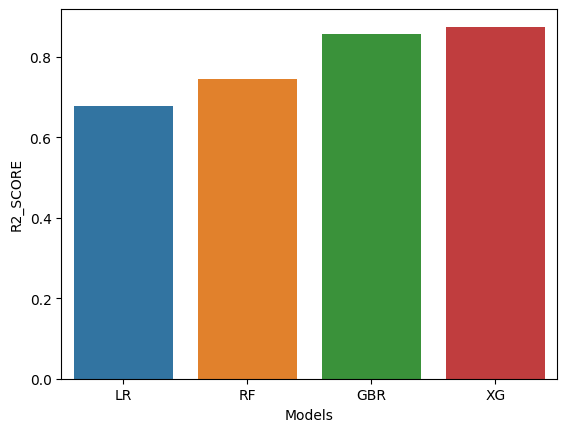

In [200]:
sns.barplot(x=final_dataFrame['Models'],y=final_dataFrame['R2_SCORE'])

**📥SAVING MODEL**

In [201]:
xg = XGBRegressor()
xg_final = xg.fit(X,Y)

In [202]:
import joblib

In [203]:
joblib.dump(xg_final,'car_price_predictor')

['car_price_predictor']

In [204]:
model = joblib.load('car_price_predictor')

**🔮PREDICTION ON NEW DATA**

In [205]:
import pandas as pd
new_data = pd.DataFrame({
    'Present_Price':4.79,
    'Driven_kms':3500,
    'Fuel_Type':0,
    'Selling_type':0,
    'Transmission':1,
    'Owner':1,
    'Age':5
},index=[0])

In [206]:
model.predict(new_data)


array([3.7740946], dtype=float32)

# **THANK YOU!🙌**